#Import Library

In [ ]:
# General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,plot_roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/1 Swarm Behaviour Classification/Swarm_Behaviour.csv')

# Exploratory Data Analysis

In [ ]:
data.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


In [ ]:
data.shape

(23309, 2401)

In [ ]:
data.isna().sum()

x1                 0
y1                 0
xVel1              0
yVel1              0
xA1                0
                  ..
xC200              0
yC200              0
nAC200             0
nS200              0
Swarm_Behaviour    0
Length: 2401, dtype: int64

In [ ]:
data.describe()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
count,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,...,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000
mean,104.413631,-73.481853,-0.697607,0.061480,-0.147964,0.152034,-1.055732,-0.731546,-0.034915,0.077123,...,0.086824,-0.126276,0.127497,-1.526260,-0.118891,-0.012388,0.085076,26.433995,2.130679,0.341242
std,843.200079,573.329374,6.427840,7.366739,0.376078,0.588582,26.388570,20.684183,0.559690,0.628478,...,7.683539,0.378830,0.570589,73.903764,7.002853,0.555143,0.614603,34.136098,7.431911,0.474136
min,-1414.140000,-1012.180000,-18.590000,-18.410000,-1.000000,-1.000000,-944.070000,-847.910000,-2.680000,-2.680000,...,-18.440000,-1.040000,-1.000000,-4079.230000,-370.240000,-2.680000,-2.680000,0.000000,0.000000,0.000000
25%,-542.020000,-611.220000,-5.360000,-5.680000,-0.230000,-0.010000,0.000000,0.000000,-0.040000,-0.020000,...,-5.600000,-0.190000,0.000000,0.000000,0.000000,-0.070000,0.000000,2.000000,0.000000,0.000000
50%,145.300000,-157.350000,-0.450000,-1.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
75%,896.200000,425.700000,3.940000,7.260000,0.000000,0.940000,0.000000,0.000000,0.000000,0.020000,...,7.480000,0.000000,0.540000,0.000000,0.000000,0.000000,0.030000,35.000000,1.000000,1.000000
max,1406.080000,1015.800000,18.470000,18.570000,1.000000,1.040000,68.560000,234.740000,2.680000,2.680000,...,18.490000,1.000000,1.040000,255.990000,57.840000,2.680000,2.680000,142.000000,64.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


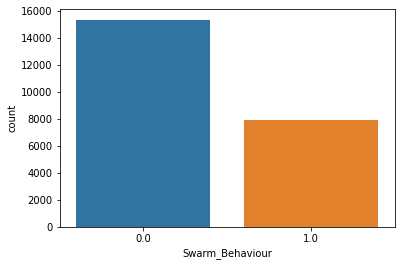

In [ ]:
sns.countplot(data["Swarm_Behaviour"])

In [ ]:
# jumlah kelas
class_count_0, class_count_1 = data['Swarm_Behaviour'].value_counts()

# pembagian kelas
class_0 = data[data['Swarm_Behaviour'] == 0]
class_1 = data[data['Swarm_Behaviour'] == 1]

# print masih-masing ukuran kelas
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (15355, 2401)
class 1: (7954, 2401)


In [ ]:
# Create a unique id based on the index
data = data.reset_index()
data = data.rename(columns={"index": "id"})

data.head()

,id,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


In [ ]:
data.loc[data['Swarm_Behaviour'] == 1]

,id,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
10,10,872.93,719.36,-0.26,7.16,-0.04,1.00,0.00,0.00,-0.04,...,8.35,0.01,1.00,0.0,0.0,0.01,1.00,16,6,1.0
11,11,-1273.71,793.03,-0.84,8.18,-0.10,1.00,0.00,0.00,-0.27,...,9.75,0.00,0.00,0.0,0.0,0.00,0.00,0,0,1.0
12,12,-1320.94,-738.85,-7.93,-2.31,-0.98,-0.21,0.00,0.00,0.99,...,2.78,-0.96,0.26,0.0,0.0,-0.48,0.88,1,0,1.0
14,14,1070.44,-766.63,-0.34,9.57,-0.04,1.00,0.00,0.00,-0.04,...,9.06,-0.04,1.00,0.0,0.0,-0.03,1.00,14,2,1.0
17,17,1342.20,-206.96,-1.65,9.27,-0.11,0.99,-1.02,-1.07,0.22,...,9.27,-0.06,1.00,0.0,0.0,-0.06,1.00,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23280,23280,16.00,402.90,-0.50,11.10,-0.05,1.04,0.00,0.00,0.00,...,8.18,0.02,1.04,0.0,0.0,0.00,0.00,16,0,1.0
23291,23291,-1253.48,-234.86,-7.37,-1.36,-0.56,-0.03,0.00,0.00,0.32,...,-1.90,-0.56,0.01,0.0,0.0,0.20,-0.25,30,0,1.0
23296,23296,-1328.64,-649.53,0.02,8.64,-0.10,0.99,0.00,0.00,-0.25,...,9.18,-0.06,1.00,0.0,0.0,-0.06,1.00,1,0,1.0
23297,23297,-425.25,104.59,-9.43,-2.66,-0.95,-0.33,0.00,0.00,-0.97,...,2.00,-0.97,0.23,0.0,0.0,-0.96,0.27,3,0,1.0


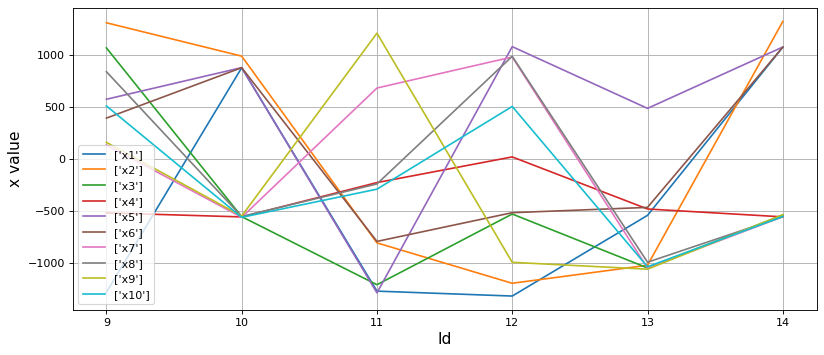

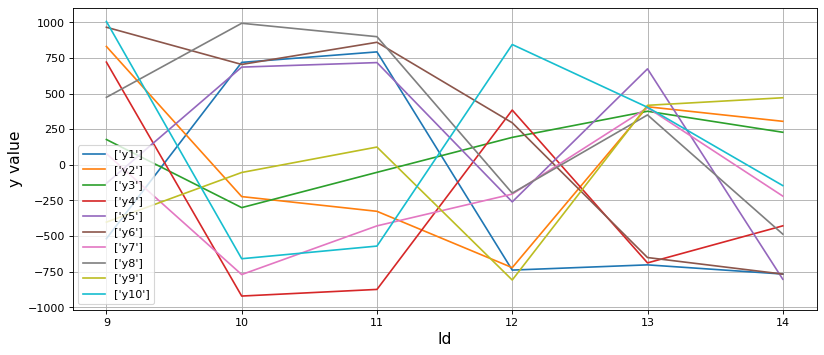

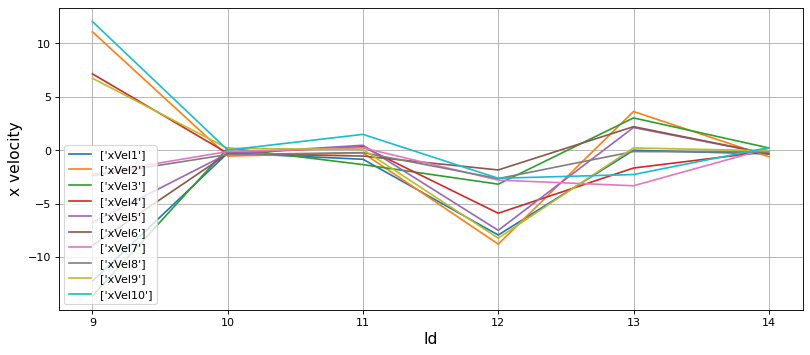

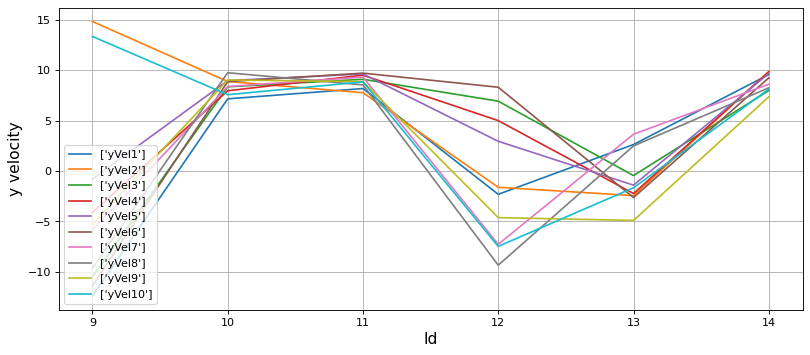

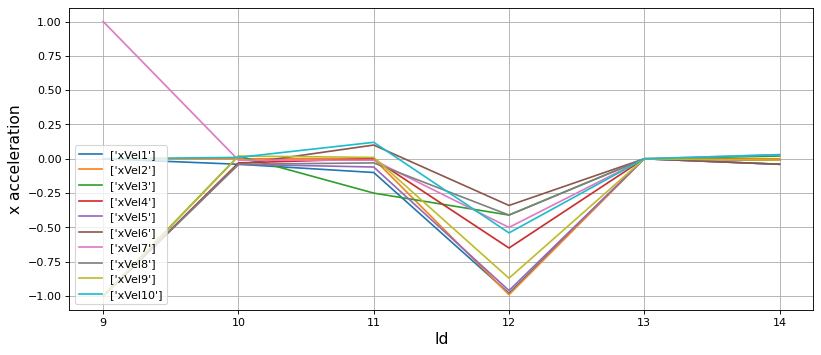

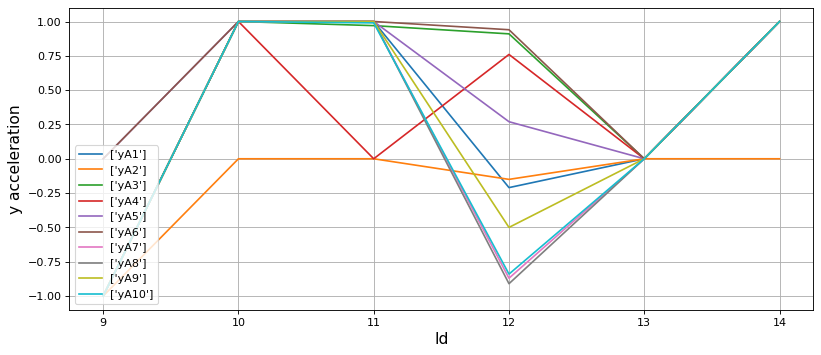

In [ ]:
col = data.columns
from matplotlib.pyplot import figure
figure(figsize=(12, 5), dpi=80)
for x in range(1,11):
    plt.plot(data['id'][9:15], data["x"+str(x)][9:15], label=["x"+str(x)])
plt.ylabel('x value', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.legend(loc=3)
plt.grid()

figure(figsize=(12, 5), dpi=80)
for x in range(1,11):
    plt.plot(data['id'][9:15], data["y"+str(x)][9:15], label=["y"+str(x)])
plt.ylabel('y value', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.legend(loc=3)
plt.grid()

figure(figsize=(12, 5), dpi=80)
for x in range(1,11):
    plt.plot(data['id'][9:15], data["xVel"+str(x)][9:15], label=["xVel"+str(x)])
plt.ylabel('x velocity', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.legend(loc=3)
plt.grid()

figure(figsize=(12, 5), dpi=80)
for x in range(1,11):
    plt.plot(data['id'][9:15], data["yVel"+str(x)][9:15], label=["yVel"+str(x)])
plt.ylabel('y velocity', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.legend(loc=3)
plt.grid()

figure(figsize=(12, 5), dpi=80)
for x in range(1,11):
    plt.plot(data['id'][9:15], data["xA"+str(x)][9:15], label=["xVel"+str(x)])
plt.ylabel('x acceleration', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.legend(loc=3)
plt.grid()

figure(figsize=(12, 5), dpi=80)
for x in range(1,11):
    plt.plot(data['id'][9:15], data["yA"+str(x)][9:15], label=["yA"+str(x)])
plt.ylabel('y acceleration', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.legend(loc=3)
plt.grid()

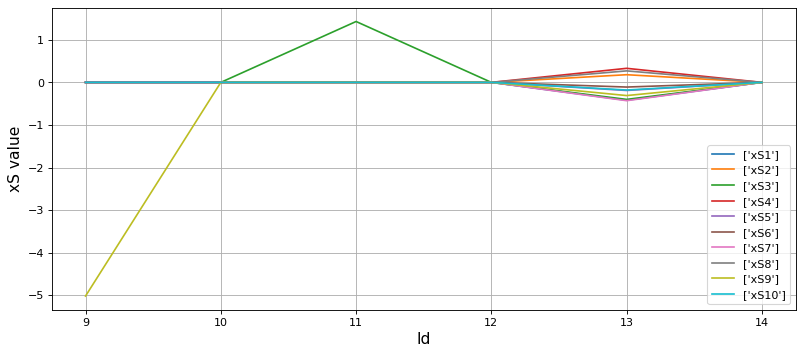

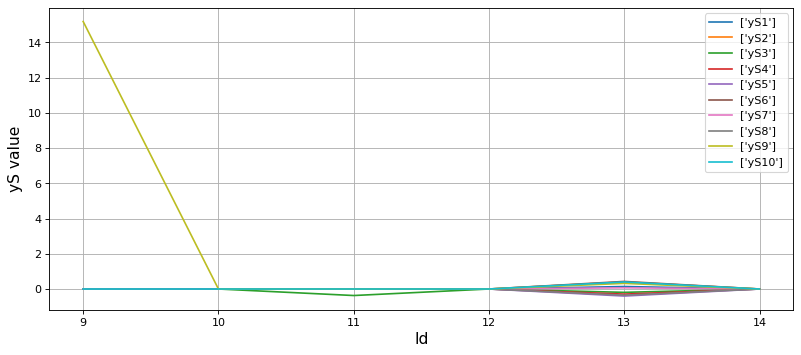

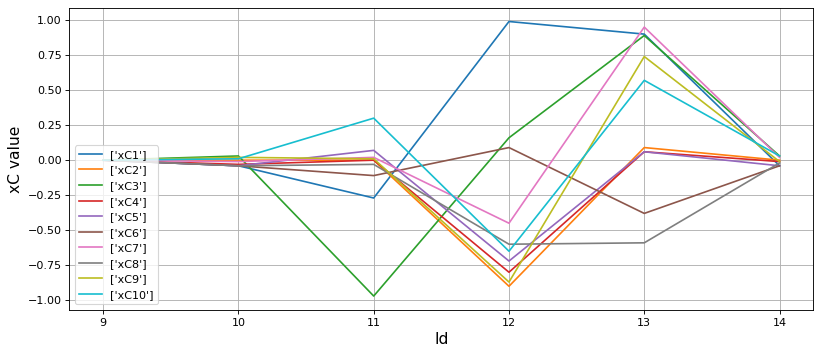

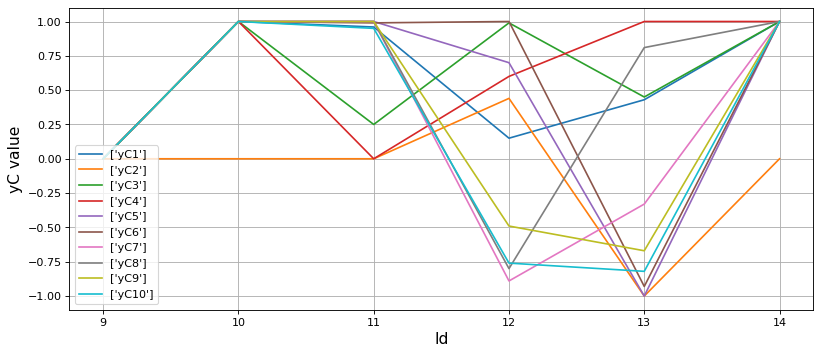

In [ ]:
figure(figsize=(12, 5), dpi=80)
for x in range(1,11):
    plt.plot(data['id'][9:15], data["xS"+str(x)][9:15], label=["xS"+str(x)])
plt.ylabel('xS value', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

figure(figsize=(12, 5), dpi=80)
for x in range(1,11):
    plt.plot(data['id'][9:15], data["yS"+str(x)][9:15], label=["yS"+str(x)])
plt.ylabel('yS value', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.legend(loc='upper right')
plt.grid()

figure(figsize=(12, 5), dpi=80)
for x in range(1,11):
    plt.plot(data['id'][9:15], data["xC"+str(x)][9:15], label=["xC"+str(x)])
plt.ylabel('xC value', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.legend(loc='lower left')
plt.grid()

figure(figsize=(12, 5), dpi=80)
for x in range(1,11):
    plt.plot(data['id'][9:15], data["yC"+str(x)][9:15], label=["yC"+str(x)])
plt.ylabel('yC value', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.legend(loc='lower left')
plt.grid()

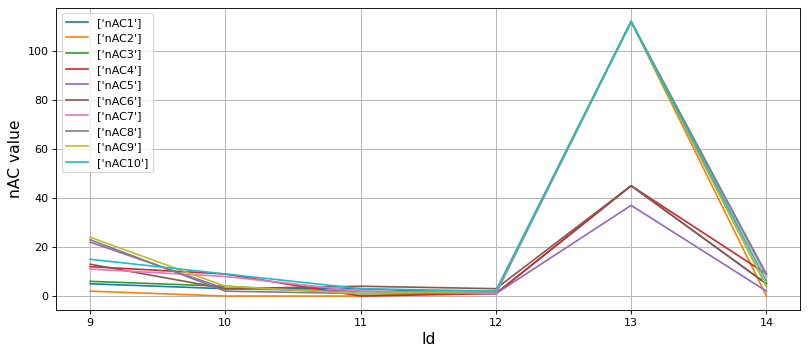

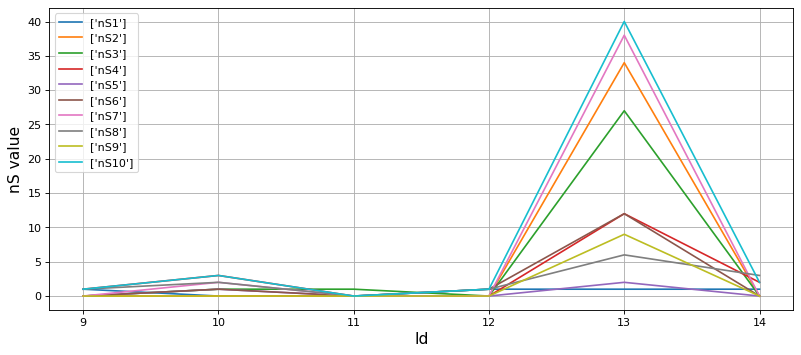

In [ ]:
figure(figsize=(12, 5), dpi=80)
for x in range(1,11):
    plt.plot(data['id'][9:15], data["nAC"+str(x)][9:15], label=["nAC"+str(x)])
plt.ylabel('nAC value', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.legend(loc='upper left')
plt.grid()

figure(figsize=(12, 5), dpi=80)
for x in range(1,11):
    plt.plot(data['id'][9:15], data["nS"+str(x)][9:15], label=["nS"+str(x)])
plt.ylabel('nS value', fontsize=14)
plt.xlabel('Id', fontsize=14)
plt.legend(loc='upper left')
plt.grid()

# Prepocessing Data

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=data.drop("Swarm_Behaviour",axis=1)
X=data.drop("id",axis=1)
X=scaler.fit_transform(X)

In [ ]:
#We scale for the PCA and future models
variance=[]
p=[50,100,150,200,300,400,500,600,700,800,900,1000,1100,1300,1500,1700,1900,2000]
for p in p:
    pca_model=PCA(n_components=p)
    pca_model.fit(X)
    variance.append(np.sum(pca_model.explained_variance_ratio_))
    print("Components:",p)

Components: 50
Components: 100
Components: 150
Components: 200
Components: 300
Components: 400
Components: 500
Components: 600
Components: 700
Components: 800
Components: 900
Components: 1000
Components: 1100
Components: 1300
Components: 1500
Components: 1700
Components: 1900
Components: 2000


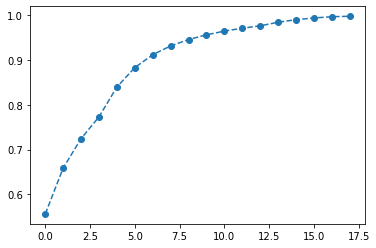

In [ ]:
import matplotlib.pyplot as plt
plt.plot(variance,"o--")

We se that at 400-500 components the variance of the data is catched very well

In [ ]:
pca_model=PCA(n_components=400)
pca_model.fit(X)

PCA(n_components=400)

In [ ]:
np.sum(pca_model.explained_variance_ratio_)

0.8831481495449063

At 400 components is okay, we have the 90% of the variance. So we reduce from 2401 to 400. Thats almost the 17% of the data (Dimensionally speaking)

In [ ]:
features=pca_model.transform(X)
features

array([[-1.08082258e+01, -1.04180550e-01, -1.06000228e+01, ...,
         1.41478628e-01,  2.21038851e-02, -4.65566009e-01],
       [-7.91563782e-01, -4.39103785e+00, -7.43874544e+00, ...,
         8.78395328e-01, -6.61050721e-03, -6.95521725e-01],
       [-4.03945716e+00, -5.84437489e+00, -1.14540917e+01, ...,
        -1.07127124e-01, -8.75487369e-01,  5.91757737e-01],
       ...,
       [-1.13820071e+01,  5.64978641e-02, -1.07846627e+01, ...,
        -8.08314321e-01, -2.35532047e-01, -1.64340726e+00],
       [-2.49841908e+01, -1.99103909e+01,  1.51218292e+01, ...,
        -1.64603625e+00,  2.92331994e+00,  3.11635139e-01],
       [-2.68900606e+00, -7.05137601e+00, -8.70775242e+00, ...,
        -3.51440377e-01,  3.38648355e-01,  9.43537016e-02]])

In [ ]:
X=features
y=data["Swarm_Behaviour"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

##Sliding window

In [ ]:
from pandas import DataFrame,concat
col = data.columns
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 #if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
data.shape

(23309, 2402)

In [ ]:
# copy the data
df_max_scaled = data[col[1:2401]].copy()

# apply normalization techniques
for column in df_max_scaled.columns:
	df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()

# view normalized data
display(df_max_scaled)


,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
0,0.397450,-0.000610,-0.575578,-0.233172,0.00,0.000000,0.0,0.0,0.000000,0.000000,...,-0.433657,-0.819362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.197183,0.000000
1,0.124217,-0.056202,0.124260,-0.143780,0.00,0.000000,0.0,0.0,0.000000,0.000000,...,0.541532,-0.188210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028169,0.000000
2,0.141542,-0.315092,0.215707,-0.343026,0.00,0.000000,0.0,0.0,0.067164,-0.097015,...,-0.432578,-0.507301,0.000000,0.000000,0.000000,0.000000,-0.041045,-0.111940,0.105634,0.015625
3,0.224157,-0.892735,0.045724,0.493807,-0.17,0.990385,0.0,0.0,0.000000,0.000000,...,-0.185545,0.561925,-0.250000,0.971154,0.000000,0.000000,0.000000,0.000000,0.112676,0.000000
4,0.903503,0.894408,-0.108661,0.443188,-1.00,0.961538,0.0,0.0,0.000000,0.000000,...,0.565804,0.752299,-0.961538,0.000000,0.000787,0.042324,0.000000,0.000000,0.084507,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,-0.159708,0.126984,0.655729,-0.407108,-1.00,0.000000,0.0,0.0,0.000000,0.000000,...,-0.524272,-0.273661,-0.961538,-0.961538,-0.000978,0.000567,0.000000,0.000000,0.119718,0.015625
23305,-0.956072,-0.229405,-0.046261,-0.235326,-0.07,-0.528846,0.0,0.0,0.104478,0.007463,...,0.176915,-0.671174,-0.144231,-0.673077,0.000000,0.000000,0.007463,0.026119,0.485915,0.015625
23306,-0.962147,-0.766007,-0.155460,-0.063005,0.00,0.000000,0.0,0.0,0.000000,0.000000,...,-0.422869,-0.799351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140845,0.015625
23307,0.698028,0.606113,-0.301775,-0.157243,-1.00,-0.961538,0.0,0.0,0.000000,0.000000,...,-0.092233,0.528935,-0.961538,-0.961538,0.000000,0.000000,0.000000,0.000000,0.204225,0.000000


In [ ]:
df =series_to_supervised(df_max_scaled[col[3]],7)
df

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.575578,0.124260,0.215707,0.045724,-0.108661,0.249059,0.636902,-0.281334
8,0.124260,0.215707,0.045724,-0.108661,0.249059,0.636902,-0.281334,0.559978
9,0.215707,0.045724,-0.108661,0.249059,0.636902,-0.281334,0.559978,-0.658956
10,0.045724,-0.108661,0.249059,0.636902,-0.281334,0.559978,-0.658956,-0.013986
11,-0.108661,0.249059,0.636902,-0.281334,0.559978,-0.658956,-0.013986,-0.045186
...,...,...,...,...,...,...,...,...
23304,-0.507262,0.444863,0.153308,0.239376,-0.627757,-0.075847,0.118881,0.655729
23305,0.444863,0.153308,0.239376,-0.627757,-0.075847,0.118881,0.655729,-0.046261
23306,0.153308,0.239376,-0.627757,-0.075847,0.118881,0.655729,-0.046261,-0.155460
23307,0.239376,-0.627757,-0.075847,0.118881,0.655729,-0.046261,-0.155460,-0.301775


In [ ]:
df =series_to_supervised(data['Swarm_Behaviour'],7)
df

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
23304,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23305,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23306,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23307,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y1 = df1['var1(t)']
X1 = df
X1 = np.array(X1)

xtrain,xtest,ytrain,ytest=train_test_split(X1,y1,test_size=0.25,random_state=300)

In [ ]:
xtrain.shape

(17476, 8)

In [ ]:
ytrain.shape

(17476,)

In [ ]:
X_train.shape

(17481, 400)

# Naive Bayes

Tanpa Sliding Window

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()

In [ ]:
#classification
BNB.fit(X_train,y_train)
#accuracy
y_pred1=BNB.predict(X_test)
y_pred2=BNB.predict(X_train)
acc_BNB=accuracy_score(y_test,y_pred1)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred1))
#mean absolute error
mae_train = metrics.mean_absolute_error(y_train, y_pred2)
print('mae train:',mae_train)
mae_test = metrics.mean_absolute_error(y_test, y_pred1)
print('mae test:',mae_test)

Train:  0.8714032378010411
Test:  0.8677076183939602
mae train: 0.12859676219895888
mae test: 0.13229238160603982


dengan sliding window

In [ ]:
#classification
BNB1=BernoulliNB()
BNB1.fit(xtrain,ytrain)

BernoulliNB()

In [ ]:
#accuracy
ypred1=BNB1.predict(xtest)
ypred2=BNB1.predict(xtrain)
acc_BNB=accuracy_score(ytest,ypred1)
print("Train: ",accuracy_score(ytrain,ypred2))
print("Test: ",accuracy_score(ytest,ypred1))
#mean absolute error
mae_train = metrics.mean_absolute_error(ytrain, ypred2)
print('mae train:',mae_train)
mae_test = metrics.mean_absolute_error(ytest, ypred1)
print('mae test:',mae_test)

Train:  1.0
Test:  1.0
mae train: 0.0
mae test: 0.0


# Hidden Markov Model

Tanpa sliding window

In [ ]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import hmmlearn
from hmmlearn import hmm

In [ ]:
# Build the HMM model
model1 = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 50, random_state = 42)
hmm_model = model1.fit(X_train)

In [ ]:
#accuracy
y_pred1=model1.predict(X_test)
y_pred2=model1.predict(X_train)
acc_BNB=accuracy_score(y_test,y_pred1)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred1))
#mean absolute error
mae_train = metrics.mean_absolute_error(y_train, y_pred2)
print('mae train:',mae_train)
mae_test = metrics.mean_absolute_error(y_test, y_pred1)
print('mae test:',mae_test)

Train:  0.5892111435272581
Test:  0.5811599176389842
mae train: 0.4107888564727418
mae test: 0.4188400823610158


dengan sliding window

In [ ]:
model2 = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 50, random_state = 42)
hmm_model = model2.fit(xtrain)

In [ ]:
#accuracy
ypred1=model2.predict(xtest)
ypred2=model2.predict(xtrain)
acc_BNB=accuracy_score(ytest,ypred1)
print("Train: ",accuracy_score(ytrain,ypred2))
print("Test: ",accuracy_score(ytest,ypred1))
#mean absolute error
mae_train = metrics.mean_absolute_error(ytrain, ypred2)
print('mae train:',mae_train)
mae_test = metrics.mean_absolute_error(ytest, ypred1)
print('mae test:',mae_test)

Train:  0.4530212863355459
Test:  0.4471335393065568
mae train: 0.5469787136644542
mae test: 0.5528664606934431


# SVM

tanpa sliding window

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='linear', C=1.0)
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
#accuracy
y_pred1=svc.predict(X_test)
y_pred2=svc.predict(X_train)
acc_BNB=accuracy_score(y_test,y_pred1)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred1))
#mean absolute error
mae_train = metrics.mean_absolute_error(y_train, y_pred2)
print('mae train:',mae_train)
mae_test = metrics.mean_absolute_error(y_test, y_pred1)
print('mae test:',mae_test)

Train:  0.9647045363537555
Test:  0.946636925188744
mae train: 0.035295463646244495
mae test: 0.053363074811256


dengan sliding window

In [ ]:
svc1=SVC(kernel='rbf', C=1)
svc1.fit(xtrain,ytrain)

SVC(C=1)

In [ ]:
#accuracy
ypred1=svc1.predict(xtest)
ypred2=svc1.predict(xtrain)
acc_BNB=accuracy_score(ytest,ypred1)
print("Train: ",accuracy_score(ytrain,ypred2))
print("Test: ",accuracy_score(ytest,ypred1))
#mean absolute error
mae_train = metrics.mean_absolute_error(ytrain, ypred2)
print('mae train:',mae_train)
mae_test = metrics.mean_absolute_error(ytest, ypred1)
print('mae test:',mae_test)

Train:  1.0
Test:  1.0
mae train: 0.0
mae test: 0.0


# LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
#from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences
from keras.layers import RNN,Activation

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
xtrain =xtrain.reshape(xtrain.shape[0],xtrain.shape[1] , 1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1] , 1)

tanpa sliding window

In [ ]:
 model=tf.keras.models.Sequential([
        tf.keras.layers.LSTM(100, activation='hard_sigmoid', return_sequences=True, input_shape=[400, 1]),
        tf.keras.layers.LSTM(64, activation='hard_sigmoid'),
        tf.keras.layers.Dense(1, activation='hard_sigmoid')
        ])

model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

Epoch 1/3
274/274 [==============================] - 380s 1s/step - loss: 0.3785 - val_loss: 0.3466
Epoch 2/3
274/274 [==============================] - 372s 1s/step - loss: 0.3395 - val_loss: 0.3466
Epoch 3/3
274/274 [==============================] - 369s 1s/step - loss: 0.3395 - val_loss: 0.3466


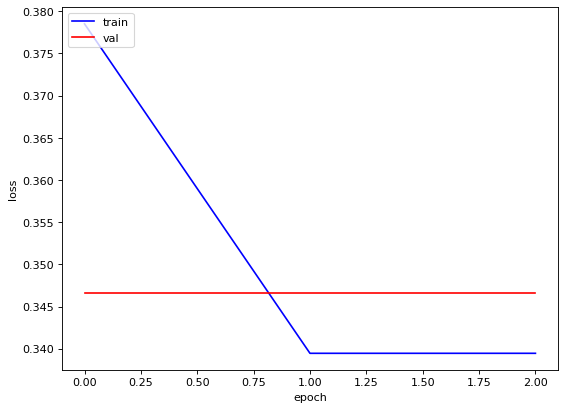

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3,batch_size=64,verbose=1)
loss = history.history['loss']
val_loss = history.history['val_loss']

figure(figsize=(8, 6), dpi=80)
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#accuracy
y_pred1=model.predict(X_test)
y_pred2=model.predict(X_train)
acc_BNB=accuracy_score(y_test,y_pred1)
print("Train: ",accuracy_score(y_train,y_pred2))
print("Test: ",accuracy_score(y_test,y_pred1))
#mean absolute error
mae_train = metrics.mean_absolute_error(y_train, y_pred2)
print('mae train:',mae_train)
mae_test = metrics.mean_absolute_error(y_test, y_pred1)
print('mae test:',mae_test)

547/547 [==============================] - 88s 161ms/step
Train:  0.6605457353698301
Test:  0.6533973919011667
mae train: 0.3394542646301699
mae test: 0.3466026080988332


dengan sliding window

In [ ]:
model=tf.keras.models.Sequential([
        tf.keras.layers.LSTM(100, activation='hard_sigmoid', return_sequences=True, input_shape=[8, 1]),
        tf.keras.layers.LSTM(64, activation='hard_sigmoid'),
        tf.keras.layers.Dense(1, activation='hard_sigmoid')
        ])

model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

Epoch 1/3
274/274 [==============================] - 17s 49ms/step - loss: 0.3949 - val_loss: 0.3375
Epoch 2/3
274/274 [==============================] - 13s 48ms/step - loss: 0.3426 - val_loss: 0.3375
Epoch 3/3
274/274 [==============================] - 13s 47ms/step - loss: 0.3426 - val_loss: 0.3375


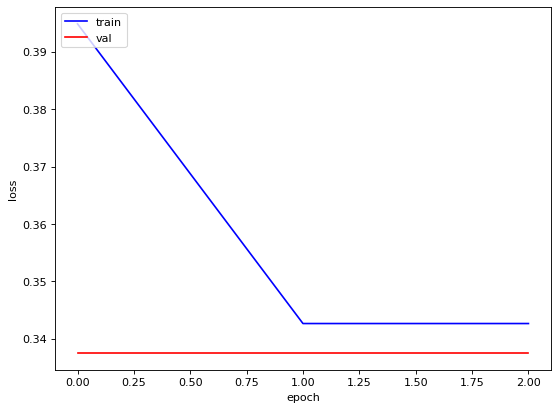

In [ ]:
history = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=3,batch_size=64,verbose=1)
loss = history.history['loss']
val_loss = history.history['val_loss']

figure(figsize=(8, 6), dpi=80)
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#accuracy
y_pred1=model.predict(xtest)
y_pred2=model.predict(xtrain)
acc=accuracy_score(ytest,y_pred1)
print("Train: ",accuracy_score(ytrain,y_pred2))
print("Test: ",accuracy_score(ytest,y_pred1))
#mean absolute error
mae_train = metrics.mean_absolute_error(ytrain, y_pred2)
print('mae train:',mae_train)
mae_test = metrics.mean_absolute_error(ytest, y_pred1)
print('mae test:',mae_test)

547/547 [==============================] - 2s 4ms/step
Train:  0.6573586633096818
Test:  0.6625472021970478
mae train: 0.34264133669031815
mae test: 0.3374527978029523
